In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline 
import seaborn as sns


In [ ]:
df= pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
# to avoid encoding error, use unicode_escape

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# drop unrelated / blank columns 
df.drop(['Status', 'unnamed1'], axis =1, inplace = True) # axix =1 means full vertical column

In [ ]:
# check for null values
pd.isnull(df).sum()


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
#drop null values 
df.dropna(inplace= True) # inplace =True is used to save the changes 
df.shape


(11239, 13)

In [ ]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtype

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
# rename coulmn
df.rename(columns={'Marital_Status': 'Married'}) # this change has not been saved bcz we not used inplace function 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
#  used describe () fo perticulr columns 
df[['Age','Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis


#### Gender

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

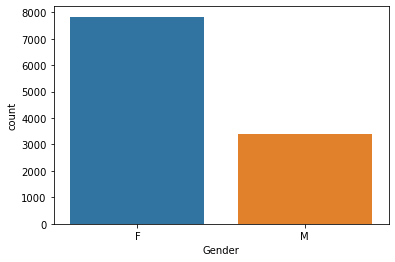

In [ ]:
ax= sns.countplot(x= 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

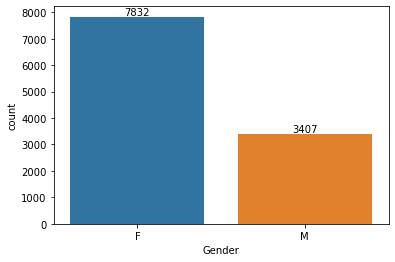

In [ ]:
import seaborn as sns

ax = sns.countplot(x='Gender', data=df)

for bar in ax.patches:
    ax.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


In [ ]:
df.groupby (['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

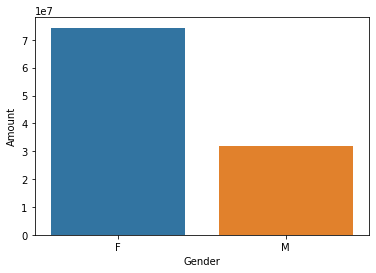

In [ ]:
 sales_gender= df.groupby (['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x= 'Gender', y= 'Amount', data= sales_gender)

##### From above graps we can see that most of the buyers are Females and even the purchasing power of Females are greater than men.



### Age

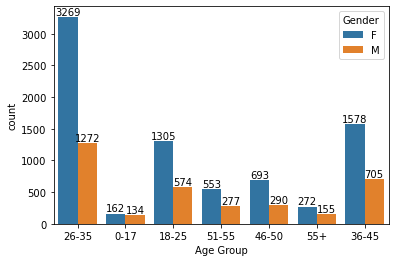

In [ ]:
import seaborn as sns

ax = sns.countplot(data=df , x= 'Age Group', hue ='Gender') # hue = 'Gender' is used to classified the data of age group into Gender

for bar in ax.patches:
    ax.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


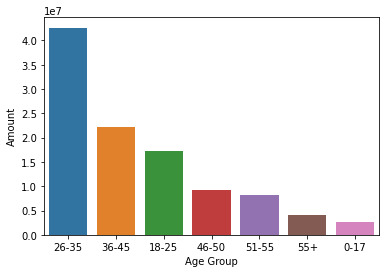

In [ ]:
 # total amount Vs age group 


sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age)
#plt.xlabel('Age Group')
#plt.ylabel('Total Amount')
#plt.title('Total Amount by Age Group')
plt.show()


#### from above graphs we can see that most of the buyres are of age group between 26-35 yrs females




### State

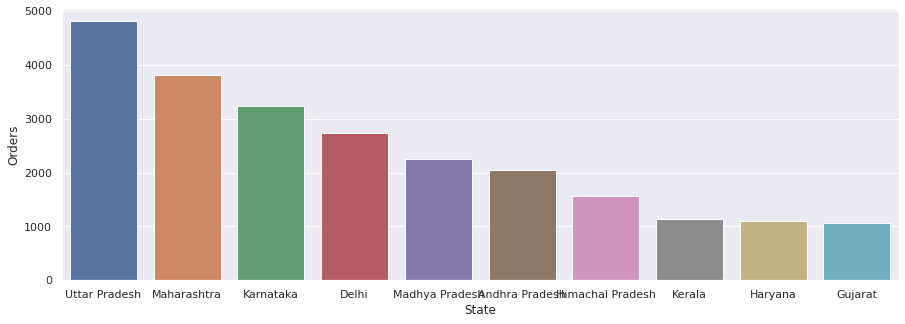

In [ ]:
 # total amount of orders fro  top 10 states 


sales_age = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.barplot(x='State', y='Orders', data=sales_age)
sns.set(rc={'figure.figsize': (15, 5)}) # which is use  to bar size
#plt.xlabel('Age Group')
#plt.ylabel('Total Amount')
#plt.title('Total Amount by Age Group')
plt.show()
 

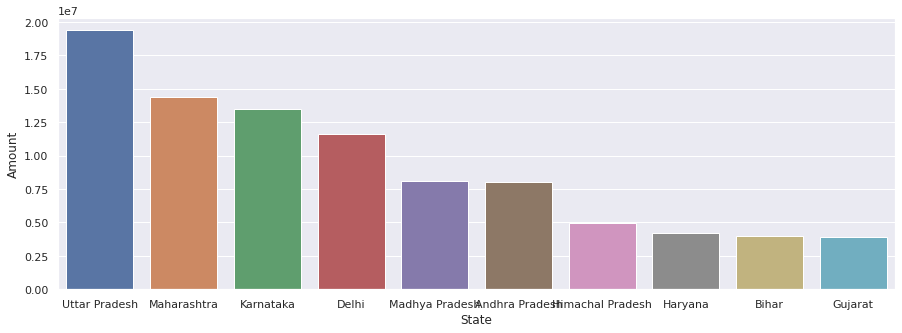

In [ ]:
# total amount / sales  from  top 10 states 
sales_age = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.barplot(x='State', y='Amount', data=sales_age)
sns.set(rc={'figure.figsize': (15, 5)}) # which is use  to bar size

plt.show()

#### from  above graphs we can see that the orders and totla sales/amount are from UP, Maharastra adb karnatka respectively.




### Marital Status

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

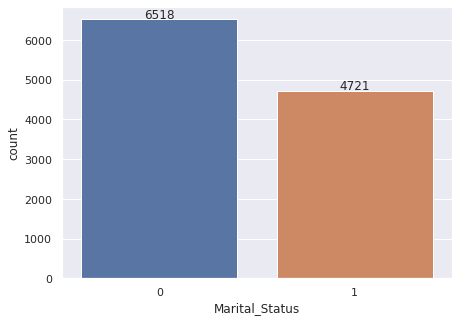

In [ ]:
import seaborn as sns

ax = sns.countplot(data=df , x= 'Marital_Status') 
sns.set(rc={'figure.figsize': (7, 5)})

for bar in ax.patches:
    ax.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


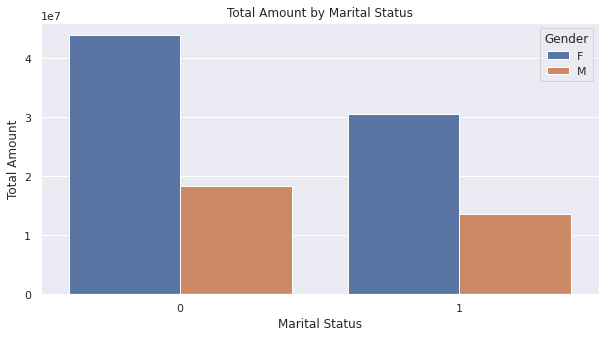

In [ ]:


sns.set(rc={'figure.figsize': (10, 5)})

sales_marital = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum()

sns.barplot(x='Marital_Status', y='Amount', data=sales_marital, hue='Gender')
plt.xlabel('Marital Status')
plt.ylabel('Total Amount')
plt.title('Total Amount by Marital Status')
plt.show()


##### from  above graphs we can see that the most of the buyres are married and women and they have high purchasing power





### Occupation

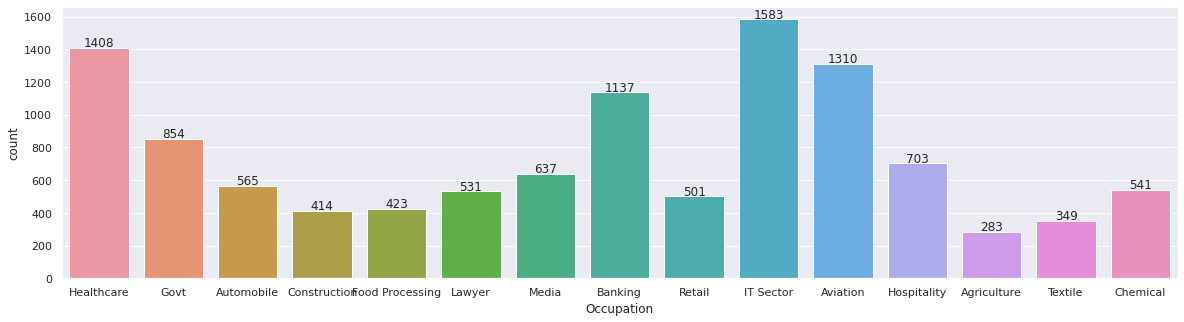

In [ ]:
import seaborn as sns

ax = sns.countplot(data=df , x= 'Occupation') 
sns.set(rc={'figure.figsize': (15, 5)})

for bar in ax.patches:
    ax.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

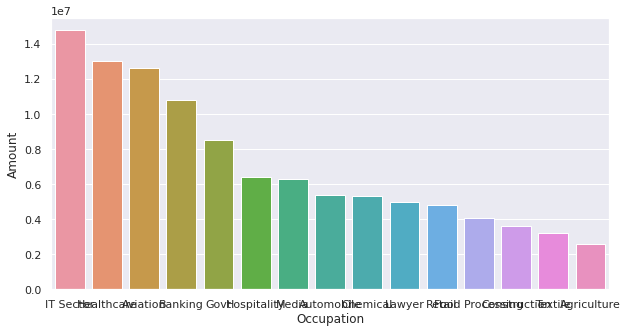

In [ ]:

sns.set(rc={'figure.figsize': (10, 5)})

sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by ='Amount', ascending =False)

sns.barplot(x='Occupation', y='Amount', data=sales_occupation)


##### from above graphs we can see that the most of the buyres are working in IT, HEalthcare and aviation sector



### PRODUCT CATEGORY

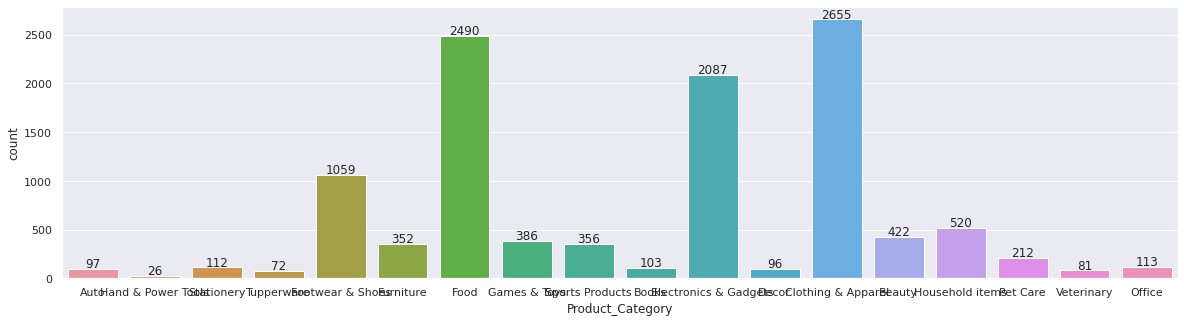

In [ ]:
import seaborn as sns

ax = sns.countplot(data=df , x= 'Product_Category')
sns.set(rc={'figure.figsize': (20, 5)})

for bar in ax.patches:
    ax.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

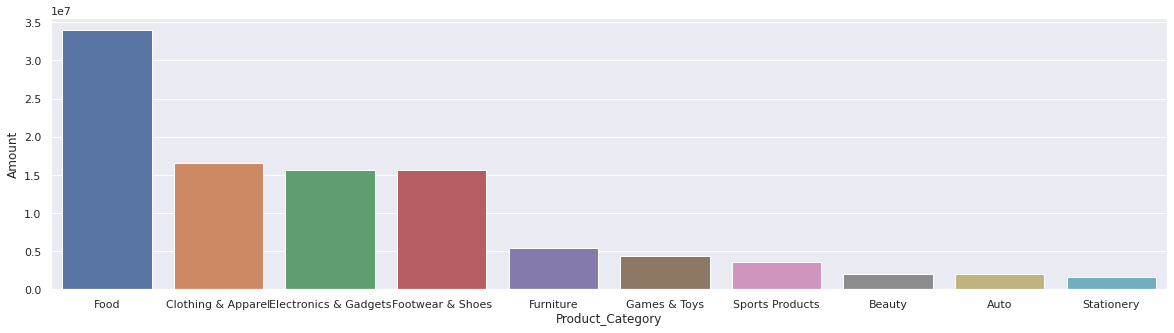

In [ ]:

sns.set(rc={'figure.figsize': (20, 5)})

sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by ='Amount', ascending =False). head(10)

sns.barplot(x='Product_Category', y='Amount', data=sales_product)


##### from above graphs we can see that the most of the sold product are food , clothes and electronic category.

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

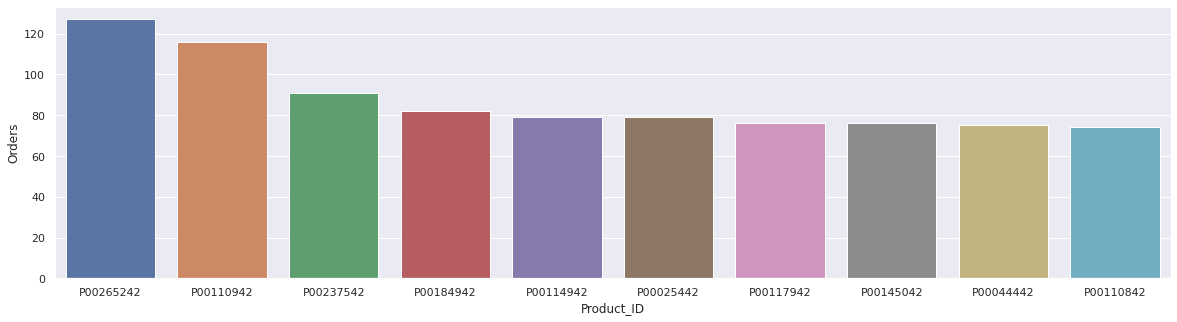

In [ ]:
sns.set(rc={'figure.figsize': (20, 5)})

sales_product = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by ='Orders', ascending =False). head(10)

sns.barplot(x='Product_ID', y='Orders', data=sales_product)


<AxesSubplot:xlabel='Product_ID'>

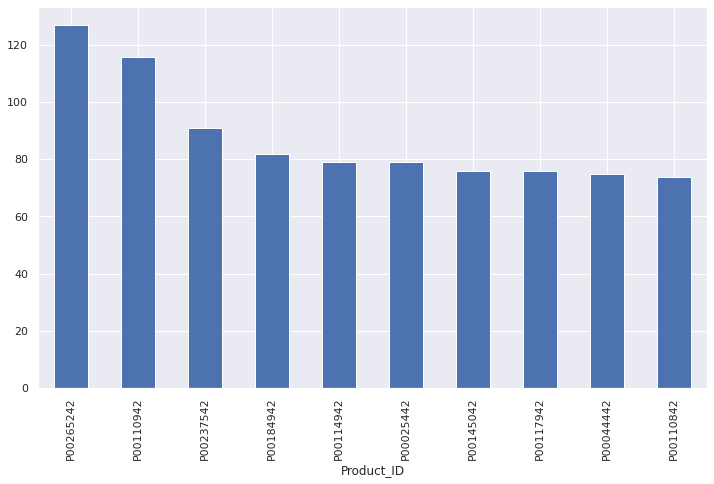

In [ ]:


fig1, ax1 = plt.subplots(figsize=(12, 7))

df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')




## Conclusion


#### Married women are aged group 26-35 yrs from UP, MH,and KR workig in IT, HEalrthcare and Aviation are more likely buy product from Food , clothing ad Electronics Category.